# k-nearest neighbors (k-NN)

## 0. Load iris dataset
- Fisher's iris dataset, the most famous bechmark dataset
- Wikipedia: https://en.wikipedia.org/wiki/Iris_flower_data_set
- UCI data repository: https://archive.ics.uci.edu/ml/datasets/Iris

In [1]:
# read the iris data into a DataFrame
import pandas as pd
url = 'http://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data'
col_names = ['sepal_length', 'sepal_width', 'petal_length', 'petal_width', 'species']
iris = pd.read_csv(url, header=None, names=col_names)

In [2]:
iris.head(5)

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [3]:
iris.shape

(150, 5)

### 참고: seaborn
- Homepage: https://stanford.edu/~mwaskom/software/seaborn/index.html
- Seaborn is a Python visualization library based on matplotlib.
- It provides a high-level interface for drawing statistical graphs.
- You can install this package from conda repository. Just type `conda install seaborn` or `pip install seaborn`.

C:\Users\JunHyuk\Anaconda3\lib\site-packages\seaborn\axisgrid.py:2065: UserWarning: The `size` parameter has been renamed to `height`; pleaes update your code.
  warnings.warn(msg, UserWarning)


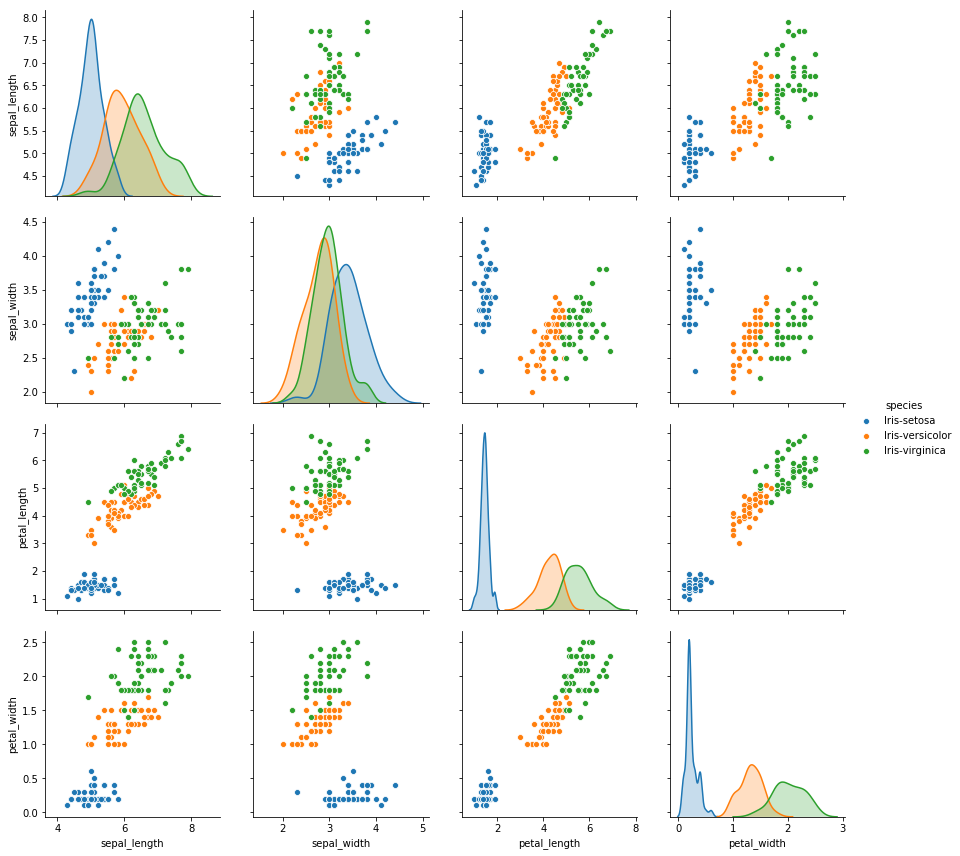

In [4]:
%matplotlib inline
import seaborn as sns
sns.pairplot(iris, hue="species", size = 3)

In [5]:
# Divite data into X and Y
X = iris.drop('species', axis = 1)
print(type(X))
print(X.shape)
X.head(5)

<class 'pandas.core.frame.DataFrame'>
(150, 4)


,sepal_length,sepal_width,petal_length,petal_width
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [6]:
y = iris.species
print(type(y))
print(y.shape)
y.head(5)

<class 'pandas.core.series.Series'>
(150,)


0    Iris-setosa
1    Iris-setosa
2    Iris-setosa
3    Iris-setosa
4    Iris-setosa
Name: species, dtype: object

In [7]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y, random_state = 123)

## k-nearest neighbors Classifier

In [8]:
# make an instance of a k-NN classifier object
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=1)
type(knn)

sklearn.neighbors.classification.KNeighborsClassifier

In [9]:
print(knn)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=None, n_neighbors=1, p=2,
           weights='uniform')


In [10]:
knn.fit(X_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=None, n_neighbors=1, p=2,
           weights='uniform')

In [11]:
y_pred = knn.predict(X_test)

In [12]:
# calculate classification accuracy
from sklearn import metrics
accuracy = metrics.accuracy_score(y_test, y_pred)
cm = metrics.confusion_matrix(y_test, y_pred)

In [13]:
print(accuracy)
print(cm)

0.8947368421052632
[[16  0  0]
 [ 0  7  1]
 [ 0  3 11]]


In [14]:
print(metrics.classification_report(y_test, y_pred))

                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        16
Iris-versicolor       0.70      0.88      0.78         8
 Iris-virginica       0.92      0.79      0.85        14

      micro avg       0.89      0.89      0.89        38
      macro avg       0.87      0.89      0.87        38
   weighted avg       0.91      0.89      0.90        38



In [15]:
accuracy_set = []
cm_set = []
k_set = [1,3,5,7,9,11]

# for k in range(1,10):
for k in k_set:
    knn = KNeighborsClassifier(n_neighbors = k)
    knn.fit(X_train, y_train)
    y_pred = knn.predict(X_test)
    accuracy = metrics.accuracy_score(y_test, y_pred)
    cm = metrics.confusion_matrix(y_test, y_pred)
    accuracy_set.append(accuracy)
    cm_set.append(cm)

In [16]:
print(accuracy_set)

[0.8947368421052632, 0.9473684210526315, 0.9736842105263158, 0.9736842105263158, 0.9736842105263158, 0.9736842105263158]


In [17]:
from pprint import pprint
pprint(accuracy_set)

[0.8947368421052632,
 0.9473684210526315,
 0.9736842105263158,
 0.9736842105263158,
 0.9736842105263158,
 0.9736842105263158]


In [18]:
print(cm_set[2])

[[16  0  0]
 [ 0  7  1]
 [ 0  0 14]]


## Practice
- Logistic Regression과 k-NN 모델의 결과를 비교해봅시다.

In [19]:
from sklearn.linear_model import LogisticRegression

In [25]:
C_set = [0.01, 0.1, 1, 10, 100, 1000, 100000]
acc_set = []
cm_set = []
models = []

for C in C_set:
    lr = LogisticRegression(penalty='l2', C=C, random_state=1234)
    lr.fit(X_train, y_train)
    y_pred = lr.predict(X_test)
    acc = metrics.accuracy_score(y_test, y_pred)
    cm = metrics.confusion_matrix(y_test, y_pred)
    
    acc_set.append(acc)
    cm_set.append(cm)
    models.append(lr)

C:\Users\JunHyuk\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\JunHyuk\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
C:\Users\JunHyuk\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\JunHyuk\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
C:\Users\JunHyuk\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: 

In [26]:
pprint(acc_set)

[0.868421052631579,
 0.9473684210526315,
 0.9736842105263158,
 0.9736842105263158,
 0.9736842105263158,
 0.9736842105263158,
 0.9210526315789473]
